## Eleições 2022 - boletins de urna

#### Notebook para analisar rapidamente os dados disponibilizados pelo TSE das eleições de 2022

Portal de Dados Abertos do TSE: https://dadosabertos.tse.jus.br/

In [1]:
# rodar para deixar as células da largura da janela do navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# imports
import sys,os
import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as clrs

sep = ';' # separador do arquivo CSV
dec = ',' # separador de decimais
enc = 'latin1' # codificação dos caracteres

### arquivos CSV

In [3]:
# arquivos CSV
bus = './tse_2022/boletins_urna/turno2/'
csv_files = glob.glob(bus + '/**/*.csv', recursive=True)
csv_files

['./tse_2022/boletins_urna/turno2/bweb_2t_AC_311020221535/bweb_2t_AC_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_AL_311020221535/bweb_2t_AL_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_AM_311020221535/bweb_2t_AM_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_AP_311020221535/bweb_2t_AP_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_BA_311020221535/bweb_2t_BA_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_CE_311020221535/bweb_2t_CE_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_DF_311020221535/bweb_2t_DF_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_ES_311020221535/bweb_2t_ES_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_GO_311020221535/bweb_2t_GO_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_MA_311020221535/bweb_2t_MA_311020221535.csv',
 './tse_2022/boletins_urna/turno2/bweb_2t_MG_311020221535/bweb_2t_MG_311020221535.csv',
 './tse_2022/boletins_urna/turno

### Leitura de Boletins de Urna turno 2 - teste inicial

In [4]:
# apenas MT - checar qual é na listagem

f = csv_files[12]
df_mt = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)
uf = df_mt['SG_UF'][0]
l = len(df_mt)
print(f'UF:{uf}, len:{l}')
cols = list(df_mt.columns)

UF:MT, len:29019


In [5]:
df_mt.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

In [6]:
df_mt

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,83AE8D12,21/09/2022 10:26:00,1 - 147,#NULO#,30/10/2022 07:00:01,30/10/2022 16:01:19,12,30/10/2022 16:04:29,-1,-1
1,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,83AE8D12,21/09/2022 10:26:00,1 - 147,#NULO#,30/10/2022 07:00:01,30/10/2022 16:01:19,12,30/10/2022 16:04:29,-1,-1
2,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,83AE8D12,21/09/2022 10:26:00,1 - 147,#NULO#,30/10/2022 07:00:01,30/10/2022 16:01:19,12,30/10/2022 16:04:29,-1,-1
3,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,83AE8D12,21/09/2022 10:26:00,1 - 147,#NULO#,30/10/2022 07:00:01,30/10/2022 16:01:19,12,30/10/2022 16:04:29,-1,-1
4,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,83AE8D12,21/09/2022 10:38:00,1 - 149,#NULO#,30/10/2022 07:05:21,30/10/2022 16:01:30,3,30/10/2022 16:06:15,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29014,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,877DF7D8,20/09/2022 13:43:00,1 - 102,#NULO#,30/10/2022 07:04:27,30/10/2022 16:01:48,17,30/10/2022 16:04:13,-1,-1
29015,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,877DF7D8,20/09/2022 13:43:00,1 - 102,#NULO#,30/10/2022 07:04:27,30/10/2022 16:01:48,17,30/10/2022 16:04:13,-1,-1
29016,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,3E41150E,20/09/2022 14:06:00,1 - 103,#NULO#,30/10/2022 07:12:43,30/10/2022 16:00:55,0,30/10/2022 16:03:14,-1,-1
29017,31/10/2022,15:50:12,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,3E41150E,20/09/2022 14:06:00,1 - 103,#NULO#,30/10/2022 07:12:43,30/10/2022 16:00:55,0,30/10/2022 16:03:14,-1,-1


In [7]:
# quantas urnas efetivadas?
ls_uef = list(df_mt['NR_URNA_EFETIVADA'].unique())
len(ls_uef)

7652

In [8]:
# pivot da tabela sem fill_values
df_pvt = pd.pivot(df_mt, index=['NM_MUNICIPIO','NR_URNA_EFETIVADA','NR_SECAO'], values='QT_VOTOS', columns=['NM_VOTAVEL']).reset_index()
df_pvt.columns

Index(['NM_MUNICIPIO', 'NR_URNA_EFETIVADA', 'NR_SECAO', 'Branco',
       'JAIR BOLSONARO', 'LULA', 'Nulo'],
      dtype='object', name='NM_VOTAVEL')

In [9]:
df_pvt

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,NR_SECAO,Branco,JAIR BOLSONARO,LULA,Nulo
0,ACORIZAL,2000805,958,3.0,130.0,141.0,3.0
1,ACORIZAL,2000990,945,3.0,141.0,155.0,2.0
2,ACORIZAL,2001038,939,3.0,54.0,79.0,2.0
3,ACORIZAL,2001119,944,1.0,140.0,152.0,2.0
4,ACORIZAL,2001225,947,6.0,147.0,135.0,1.0
...,...,...,...,...,...,...,...
7647,ÁGUA BOA,1188225,2,NaN,192.0,33.0,1.0
7648,ÁGUA BOA,1194767,17,NaN,189.0,30.0,3.0
7649,ÁGUA BOA,1195298,66,1.0,185.0,28.0,NaN
7650,ÁGUA BOA,1195452,6,2.0,129.0,45.0,3.0


In [10]:
df_pvt[df_pvt['NR_URNA_EFETIVADA']==1054014]

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,NR_SECAO,Branco,JAIR BOLSONARO,LULA,Nulo
1323,CONFRESA,1054014,158,NaN,NaN,383.0,1.0


In [11]:
df_pvt[pd.isna(df_pvt['JAIR BOLSONARO'])]

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,NR_SECAO,Branco,JAIR BOLSONARO,LULA,Nulo
724,CAMPINÁPOLIS,1048804,189,NaN,NaN,265.0,5.0
1323,CONFRESA,1054014,158,NaN,NaN,383.0,1.0
4566,PEIXOTO DE AZEVEDO,1759301,255,NaN,NaN,116.0,NaN
4856,PORTO ALEGRE DO NORTE,1071954,191,NaN,NaN,55.0,NaN
5805,SANTA TEREZINHA,1760978,86,1.0,NaN,248.0,3.0


In [12]:
# pivot com fill_values 
df_pvt = pd.pivot_table(df_mt, index=['NM_MUNICIPIO','NR_URNA_EFETIVADA','NR_SECAO'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc=np.min, fill_value=0).reset_index()


In [13]:
df_pvt

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,NR_SECAO,Branco,JAIR BOLSONARO,LULA,Nulo
0,ACORIZAL,2000805,958,3,130,141,3
1,ACORIZAL,2000990,945,3,141,155,2
2,ACORIZAL,2001038,939,3,54,79,2
3,ACORIZAL,2001119,944,1,140,152,2
4,ACORIZAL,2001225,947,6,147,135,1
...,...,...,...,...,...,...,...
7647,ÁGUA BOA,1188225,2,0,192,33,1
7648,ÁGUA BOA,1194767,17,0,189,30,3
7649,ÁGUA BOA,1195298,66,1,185,28,0
7650,ÁGUA BOA,1195452,6,2,129,45,3


In [14]:
df_pvt[df_pvt['JAIR BOLSONARO']==0]

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,NR_SECAO,Branco,JAIR BOLSONARO,LULA,Nulo
724,CAMPINÁPOLIS,1048804,189,0,0,265,5
1323,CONFRESA,1054014,158,0,0,383,1
4566,PEIXOTO DE AZEVEDO,1759301,255,0,0,116,0
4856,PORTO ALEGRE DO NORTE,1071954,191,0,0,55,0
5805,SANTA TEREZINHA,1760978,86,1,0,248,3


In [15]:
df_pvt[df_pvt['LULA']==0]

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,NR_SECAO,Branco,JAIR BOLSONARO,LULA,Nulo


### Leitura de Boletins de Urna turno 2 - Tudo

In [16]:
# loop para ler e concatenar dados do Brasil

# lista para os valores de len() dos dfs de cada estado, para conferencia depois
lendf = []

# 1 - ler o primeirp arquivo da lista, para ter dataframe no formato certo
f = csv_files[0]
df = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)
uf = df['SG_UF'][0]
l = len(df)
lendf.append(l)
print(f'UF:{uf}, len:{l}')
cols = list(df.columns)

df_buBR = df.copy()

# 2 - loop pelos outros arquivos, concatenando com o primeiro
for f in csv_files[1:]:
    df = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)
    uf = df['SG_UF'][0]
    l = len(df)
    lendf.append(l)
    print(f'UF:{uf}, len:{l}')
    df_buBR = pd.concat([df_buBR,df])
    


UF:AC, len:7925
UF:AL, len:52620
UF:AM, len:57813
UF:AP, len:6557
UF:BA, len:269589
UF:CE, len:88629
UF:DF, len:26792
UF:ES, len:73301
UF:GO, len:57159
UF:MA, len:61586
UF:MG, len:196561
UF:MS, len:54313
UF:MT, len:29019
UF:PA, len:68696
UF:PB, len:76363
UF:PE, len:163314
UF:PI, len:34085
UF:PR, len:100947
UF:RJ, len:134923
UF:RN, len:29904
UF:RO, len:32820
UF:RR, len:4593
UF:RS, len:215875
UF:SC, len:128410
UF:SE, len:43617
UF:SP, len:806908
UF:TO, len:14944
UF:ZZ, len:3968


In [17]:
np.sum(lendf)

2841231

In [18]:
df_buBR

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
1,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
2,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
3,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
4,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,90FF9DFC,23/09/2022 09:34:00,1 - 4,#NULO#,30/10/2022 06:00:01,30/10/2022 15:01:55,13,30/10/2022 15:05:12,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,31/10/2022,15:53:15,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,7CA1DFE2,14/09/2022 10:37:00,1 - 3390,3388,30/10/2022 08:00:01,30/10/2022 17:27:01,0,30/10/2022 17:28:14,-1,-1
3964,31/10/2022,15:53:15,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,7CA1DFE2,14/09/2022 10:47:00,1 - 3394,3398,30/10/2022 08:00:01,30/10/2022 17:25:54,0,30/10/2022 17:26:55,-1,-1
3965,31/10/2022,15:53:15,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,7CA1DFE2,14/09/2022 10:47:00,1 - 3394,3398,30/10/2022 08:00:01,30/10/2022 17:25:54,0,30/10/2022 17:26:55,-1,-1
3966,31/10/2022,15:53:15,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,7CA1DFE2,14/09/2022 10:47:00,1 - 3394,3398,30/10/2022 08:00:01,30/10/2022 17:25:54,0,30/10/2022 17:26:55,-1,-1


In [19]:
df_buBR.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

In [20]:
# quantas urnas efetivadas?
ls_uef = list(df_buBR['NR_URNA_EFETIVADA'].unique())
len(ls_uef)

471992

### Urnas com zero votos

In [21]:
df_buBR['NM_VOTAVEL'].unique()

array(['LULA', 'Nulo', 'JAIR BOLSONARO', 'Branco', 'PAULO DANTAS',
       'RODRIGO CUNHA', 'EDUARDO BRAGA', 'WILSON LIMA', 'ACM NETO',
       'JERÔNIMO', 'MANATO', 'RENATO CASAGRANDE', 'EDUARDO RIEDEL',
       'CAPITÃO CONTAR', 'JOÃO', 'PEDRO CUNHA LIMA', 'MARÍLIA ARRAES',
       'RAQUEL LYRA', 'MARCOS ROGERIO', 'CORONEL MARCOS ROCHA',
       'ONYX LORENZONI', 'EDUARDO LEITE', 'JORGINHO MELLO', 'DÉCIO LIMA',
       'FÁBIO', 'ROGÉRIO CARVALHO', 'FERNANDO HADDAD', 'TARCÍSIO'],
      dtype=object)

In [22]:
# pivot no df do Brasil inteiro
df_pvt_br = pd.pivot_table(df_buBR, index=['NM_MUNICIPIO','NR_URNA_EFETIVADA','QT_COMPARECIMENTO','NR_ZONA','NR_SECAO','SG_UF'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc=np.min, fill_value=0).reset_index()
df_pvt_br

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,QT_COMPARECIMENTO,NR_ZONA,NR_SECAO,SG_UF,ACM NETO,Branco,CAPITÃO CONTAR,CORONEL MARCOS ROCHA,...,Nulo,ONYX LORENZONI,PAULO DANTAS,PEDRO CUNHA LIMA,RAQUEL LYRA,RENATO CASAGRANDE,RODRIGO CUNHA,ROGÉRIO CARVALHO,TARCÍSIO,WILSON LIMA
0,ABADIA DE GOIÁS,1012213,294,56,58,GO,0,2,0,0,...,5,0,0,0,0,0,0,0,0,0
1,ABADIA DE GOIÁS,1013142,286,56,64,GO,0,1,0,0,...,2,0,0,0,0,0,0,0,0,0
2,ABADIA DE GOIÁS,1017752,256,56,75,GO,0,3,0,0,...,4,0,0,0,0,0,0,0,0,0
3,ABADIA DE GOIÁS,1025076,259,56,73,GO,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,ABADIA DE GOIÁS,1026250,298,56,57,GO,0,4,0,0,...,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483030,ÓLEO,1812708,214,94,68,SP,0,6,0,0,...,7,0,0,0,0,0,0,0,104,0
483031,ÓLEO,1816380,186,94,75,SP,0,5,0,0,...,9,0,0,0,0,0,0,0,121,0
483032,ÓLEO,1821552,210,94,10,SP,0,3,0,0,...,10,0,0,0,0,0,0,0,111,0
483033,ÓLEO,1822106,215,94,11,SP,0,2,0,0,...,7,0,0,0,0,0,0,0,106,0


In [23]:
# quantas urnas efetivadas?
ls_uef = list(df_pvt_br['NR_URNA_EFETIVADA'].unique())
len(ls_uef)

471992

In [24]:
# df_pvt_br[['NM_MUNICIPIO','NR_URNA_EFETIVADA','QT_COMPARECIMENTO','JAIR BOLSONARO','LULA']]

In [25]:
# df apenas com municipios, urnas e candidatos a presidente
# df_jl = df_pvt_br[['NM_MUNICIPIO','NR_URNA_EFETIVADA','QT_COMPARECIMENTO','JAIR BOLSONARO','LULA']]

In [26]:
df_pvt_br[df_pvt_br['JAIR BOLSONARO']==0]

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,QT_COMPARECIMENTO,NR_ZONA,NR_SECAO,SG_UF,ACM NETO,Branco,CAPITÃO CONTAR,CORONEL MARCOS ROCHA,...,Nulo,ONYX LORENZONI,PAULO DANTAS,PEDRO CUNHA LIMA,RAQUEL LYRA,RENATO CASAGRANDE,RODRIGO CUNHA,ROGÉRIO CARVALHO,TARCÍSIO,WILSON LIMA
527,ABARÉ,1761581,181,158,111,BA,68,1,0,0,...,12,0,0,0,0,0,0,0,0,0
530,ABARÉ,1762799,251,158,166,BA,104,3,0,0,...,6,0,0,0,0,0,0,0,0,0
536,ABARÉ,1772797,268,158,137,BA,47,0,0,0,...,8,0,0,0,0,0,0,0,0,0
544,ABARÉ,1791446,173,158,132,BA,42,1,0,0,...,5,0,0,0,0,0,0,0,0,0
547,ABARÉ,1792604,261,158,143,BA,57,1,0,0,...,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482242,ÁGUAS DE LINDÓIA,1630478,239,134,73,SP,0,10,0,0,...,22,0,0,0,0,0,0,0,152,0
482256,ÁGUAS DE LINDÓIA,1786388,249,134,104,SP,0,12,0,0,...,28,0,0,0,0,0,0,0,148,0
482715,ÁGUIA BRANCA,1762446,160,46,122,ES,0,5,0,0,...,2,0,0,0,0,105,0,0,0,0
482724,ÁGUIA BRANCA,1845844,264,46,49,ES,0,6,0,0,...,7,0,0,0,0,176,0,0,0,0


In [27]:
df_pvt_br[df_pvt_br['LULA']==0]

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,QT_COMPARECIMENTO,NR_ZONA,NR_SECAO,SG_UF,ACM NETO,Branco,CAPITÃO CONTAR,CORONEL MARCOS ROCHA,...,Nulo,ONYX LORENZONI,PAULO DANTAS,PEDRO CUNHA LIMA,RAQUEL LYRA,RENATO CASAGRANDE,RODRIGO CUNHA,ROGÉRIO CARVALHO,TARCÍSIO,WILSON LIMA
527,ABARÉ,1761581,181,158,111,BA,68,1,0,0,...,12,0,0,0,0,0,0,0,0,0
530,ABARÉ,1762799,251,158,166,BA,104,3,0,0,...,6,0,0,0,0,0,0,0,0,0
536,ABARÉ,1772797,268,158,137,BA,47,0,0,0,...,8,0,0,0,0,0,0,0,0,0
544,ABARÉ,1791446,173,158,132,BA,42,1,0,0,...,5,0,0,0,0,0,0,0,0,0
547,ABARÉ,1792604,261,158,143,BA,57,1,0,0,...,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482242,ÁGUAS DE LINDÓIA,1630478,239,134,73,SP,0,10,0,0,...,22,0,0,0,0,0,0,0,152,0
482256,ÁGUAS DE LINDÓIA,1786388,249,134,104,SP,0,12,0,0,...,28,0,0,0,0,0,0,0,148,0
482715,ÁGUIA BRANCA,1762446,160,46,122,ES,0,5,0,0,...,2,0,0,0,0,105,0,0,0,0
482724,ÁGUIA BRANCA,1845844,264,46,49,ES,0,6,0,0,...,7,0,0,0,0,176,0,0,0,0


In [28]:
# votos de Lula onde Bolsonaro teve zero
df_pvt_br[df_pvt_br['JAIR BOLSONARO']==0]['LULA'].sum()

16455

In [29]:
# votos de Bolsonaro onde Lula teve zero
df_pvt_br[df_pvt_br['LULA']==0]['JAIR BOLSONARO'].sum()

124

### Votos por Seção - Segundo Turno (re-análise)

In [31]:
f_vot_secao = './tse_2022/votacao_secao_2022_BR/votacao_secao_2022_BR.csv'
df_secao = pd.read_csv(f_vot_secao, sep=sep, encoding=enc, decimal=dec)

# segundo turno
df_secao_2t = df_secao.query('NR_TURNO == 2').copy()

In [32]:
df_secao_2t.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [33]:
df_secao_2t.query('NR_ZONA==80 and NR_SECAO ==254 and SG_UF=="PA"')

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
4021431,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,2,545,ELEIÇÃO GERAL FEDERAL 2022,30/10/2022,F,...,254,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,157,1198,280001607829,EMEF TRINCHEIRA BACAJÁ,"ALDEIA POTYKRO, VICINAL DO AJAX A 90 KM DA FAIXA"
4390954,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,2,545,ELEIÇÃO GERAL FEDERAL 2022,30/10/2022,F,...,254,1,PRESIDENTE,96,VOTO NULO,1,1198,-1,EMEF TRINCHEIRA BACAJÁ,"ALDEIA POTYKRO, VICINAL DO AJAX A 90 KM DA FAIXA"


In [34]:
df_secao_2t['NM_UE'].unique()

array(['BRASIL'], dtype=object)

In [35]:
# fazer pivot por numero da seção não funciona, pois tem o mesmo número nas outras zonas e estados
pd.pivot_table(df_secao_2t, index=['NR_SECAO'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc=np.min, fill_value=0)

NM_VOTAVEL,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,VOTO BRANCO,VOTO NULO
NR_SECAO,,,,
1,1,4,1,1
2,9,17,1,1
3,1,14,1,1
4,6,9,1,1
5,11,20,1,1
...,...,...,...,...
3363,132,363,6,1
3374,98,165,6,3
3386,83,245,0,3


In [36]:
# coluna com junção de UF, zona e seção
df_secao_2t['ufzs'] = df_secao_2t['SG_UF'] +'_'+ df_secao_2t['NR_ZONA'].map(str) +'_'+ df_secao_2t['NR_SECAO'].map(str)

In [37]:
df_secao_2t['ufzs'].unique()

array(['CE_57_270', 'GO_127_535', 'SP_152_205', ..., 'CE_59_112',
       'MA_97_207', 'MG_148_291'], dtype=object)

In [38]:
len(df_secao_2t['ufzs'])

1850892

In [39]:
df_pvt_br = pd.pivot_table(df_secao_2t, index=['ufzs','NM_MUNICIPIO'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc=np.min, fill_value=0).reset_index()

In [40]:
df_pvt_br

NM_VOTAVEL,ufzs,NM_MUNICIPIO,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,VOTO BRANCO,VOTO NULO
0,AC_1_10,RIO BRANCO,128,64,2,6
1,AC_1_100,RIO BRANCO,113,41,1,2
2,AC_1_12,RIO BRANCO,100,48,2,2
3,AC_1_129,RIO BRANCO,178,83,3,3
4,AC_1_13,RIO BRANCO,199,71,4,7
...,...,...,...,...,...,...
472023,ZZ_1_98,MUNIQUE,74,176,5,4
472024,ZZ_1_99,CÓRDOBA,82,102,3,4
472025,ZZ_1_990,MANILA,34,22,0,0
472026,ZZ_1_991,SYDNEY,109,201,4,12


In [41]:
jmb = 'JAIR MESSIAS BOLSONARO'
lil = 'LUIZ INÁCIO LULA DA SILVA'

In [42]:
(df_pvt_br[jmb].values == 0).sum() 

144

In [43]:
(df_pvt_br[lil].values == 0).sum() 

5

### Mapa com as urnas de voto zero

In [44]:
# dataframes só com votos zero
df_jmb_vz = df_pvt_br[df_pvt_br[jmb]==0]
df_jmb_vz = df_jmb_vz.rename(columns={"NM_MUNICIPIO": "nome"})
print(f'len: {len(df_jmb_vz)}')

df_lil_vz = df_pvt_br[df_pvt_br[lil]==0]
df_lil_vz = df_lil_vz.rename(columns={"NM_MUNICIPIO": "nome"})
print(f'len: {len(df_lil_vz)}')

len: 144
len: 5


In [45]:
# geopackage
gpkg_mun = './Brasil_Cartografia/mun250.gpkg'
gdf_mun250 = gpd.read_file(gpkg_mun)
gdf_mun250['nome'] = gdf_mun250['nome'].str.upper()

In [46]:
# merge jmb
gdf_mun250_jmb_vz = gdf_mun250.merge(df_jmb_vz, on='nome')

# merge lil
gdf_mun250_lil_vz = gdf_mun250.merge(df_lil_vz, on='nome')


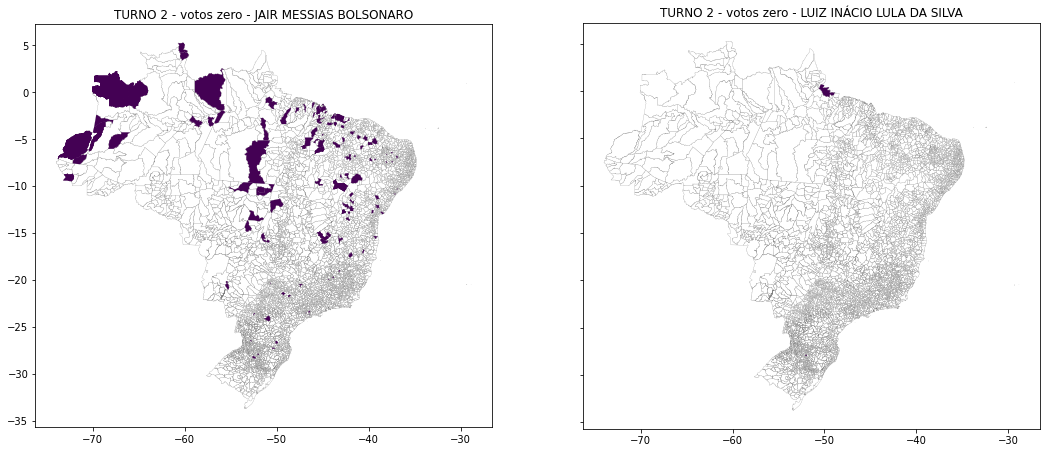

In [47]:
# dois mapas

gdf0 = gdf_mun250
gdf1 = gdf_mun250_jmb_vz
gdf2 = gdf_mun250_lil_vz
candidat1 = jmb
candidat2 = lil

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,15))

ax = axs[0]
ax.set_aspect('equal')
gdf0.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.2)
gdf1.plot(ax=ax, column=candidat1)
ax.set_title(f'TURNO 2 - votos zero - {candidat1}');

ax = axs[1]
ax.set_aspect('equal')
gdf0.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.2)
gdf2.plot(ax=ax, column=candidat2)
ax.set_title(f'TURNO 2 - votos zero - {candidat2}');


### Modelo das urnas

In [48]:
# modelos das urnas (TSE)

# DS_MODELO_URNA;NR_FAIXA_INICIAL;NR_FAIXA_INICIAL
# 2009;999500;1220500
# 2010;1220501;1345500
# 2011;1368501;1370500
# 2011;1600000;1650000
# 2013;1650001;1701000
# 2015;1750000;1950000
# 2020;2000000;2250000

# 73.284 modelo 2009
# 117.817 modelo 2010 
# 34.998 modelo 2011
# 30.142 modelo 2013 
# 95.885 modelo 2015
# 224.999 modelo 2020
# Todas 577.125

def model_ue(val):
    val = int(val)
    if val < 1220501:
        model = 'UE2009'
    elif val > 1220500 and val < 1345501:
        model = 'UE2010'
    elif val > 1368500 and val < 1650001:
        model = 'UE2011'
    elif val > 1650000 and val < 1701001:
        model = 'UE2013'
    elif val > 1701000 and val < 1950001:
        model = 'UE2015'
    elif val > 1999999:
        model = 'UE2020'
    else:
        model = f'X{val}' # debugging
    return model
    
df_buBR['modelo_urna'] = df_buBR['NR_URNA_EFETIVADA'].map(model_ue)

In [49]:
df_buBR[['NR_URNA_EFETIVADA','modelo_urna']]

,NR_URNA_EFETIVADA,modelo_urna
0,2046404,UE2020
1,2046404,UE2020
2,2046404,UE2020
3,2046404,UE2020
4,2048249,UE2020
...,...,...
3963,1023396,UE2009
3964,1019971,UE2009
3965,1019971,UE2009
3966,1019971,UE2009


In [50]:
df_buBR['modelo_urna'].value_counts() # inclui todos os candidatos de segundo turno (gov,pres)

UE2020    1156268
UE2010     568518
UE2015     523821
UE2009     274596
UE2011     165524
UE2013     152504
Name: modelo_urna, dtype: int64

In [51]:
# seleciona apenas JMB e LILS
df_buBR = df_buBR.query("NM_VOTAVEL=='JAIR BOLSONARO' or NM_VOTAVEL=='LULA'")

In [52]:
# pivot no df do Brasil inteiro
df_pvt_buBR = pd.pivot_table(df_buBR, index=['NM_MUNICIPIO','NR_URNA_EFETIVADA','QT_APTOS','modelo_urna'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc=np.min, fill_value=0).reset_index()
df_pvt_buBR

NM_VOTAVEL,NM_MUNICIPIO,NR_URNA_EFETIVADA,QT_APTOS,modelo_urna,JAIR BOLSONARO,LULA
0,ABADIA DE GOIÁS,1012213,365,UE2009,171,116
1,ABADIA DE GOIÁS,1013142,342,UE2009,172,111
2,ABADIA DE GOIÁS,1017752,335,UE2009,148,101
3,ABADIA DE GOIÁS,1025076,340,UE2009,160,96
4,ABADIA DE GOIÁS,1026250,364,UE2009,173,116
...,...,...,...,...,...,...
472022,ÓLEO,1812708,258,UE2015,109,92
472023,ÓLEO,1816380,234,UE2015,121,51
472024,ÓLEO,1821552,276,UE2015,120,77
472025,ÓLEO,1822106,280,UE2015,120,86


In [53]:
# apenas urnas modelo 2020
df_pvt_buBR_ue2020 = df_pvt_buBR.query('modelo_urna == "UE2020"')
len(df_pvt_buBR_ue2020['NR_URNA_EFETIVADA'].unique())

192691

In [54]:
# urnas modelo pre-2020
df_pvt_buBR_ue_pre2020 = df_pvt_buBR.query('modelo_urna != "UE2020"')
len(df_pvt_buBR_ue_pre2020['NR_URNA_EFETIVADA'].unique())

279300

In [55]:
# quantidade de eleitores aptos nas urnas

In [56]:
df_pvt_buBR['QT_APTOS'].describe()

count    472027.000000
mean        331.449851
std          70.099336
min          14.000000
25%         292.000000
50%         340.000000
75%         381.000000
max         800.000000
Name: QT_APTOS, dtype: float64

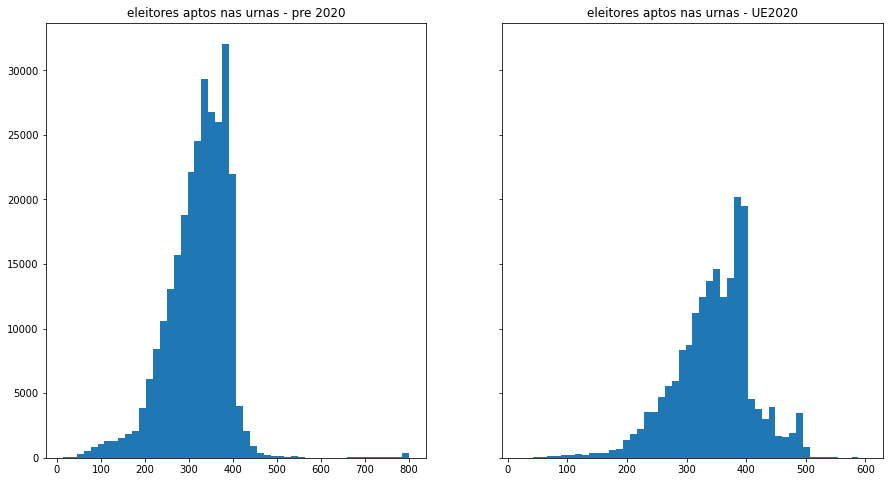

In [57]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,8))

ax=axs[0]
ax.hist(df_pvt_buBR_ue_pre2020['QT_APTOS'], bins=50);
ax.set_title('eleitores aptos nas urnas - pre 2020');

ax=axs[1]
ax.hist(df_pvt_buBR_ue2020['QT_APTOS'], bins=50);
ax.set_title('eleitores aptos nas urnas - UE2020');

In [58]:
# lista para os valores de len() dos dfs de cada estado, para conferencia depois
lendf = []

# 1 - ler o primeiro arquivo da lista, para ter dataframe no formato certo
f = csv_files[0]
df = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)
uf = df['SG_UF'][0]
l = len(df)
lendf.append(l)
cols = list(df.columns)

df_buBR = df.copy()

# 2 - loop pelos outros arquivos, concatenando com o primeiro
for f in csv_files[1:]:
    df = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)
    uf = df['SG_UF'][0]
    l = len(df)
    lendf.append(l)
    df_buBR = pd.concat([df_buBR,df])

In [60]:
# tem os candidatos a governador...
df_buBR['NM_VOTAVEL'].unique()

array(['LULA', 'Nulo', 'JAIR BOLSONARO', 'Branco', 'PAULO DANTAS',
       'RODRIGO CUNHA', 'EDUARDO BRAGA', 'WILSON LIMA', 'ACM NETO',
       'JERÔNIMO', 'MANATO', 'RENATO CASAGRANDE', 'EDUARDO RIEDEL',
       'CAPITÃO CONTAR', 'JOÃO', 'PEDRO CUNHA LIMA', 'MARÍLIA ARRAES',
       'RAQUEL LYRA', 'MARCOS ROGERIO', 'CORONEL MARCOS ROCHA',
       'ONYX LORENZONI', 'EDUARDO LEITE', 'JORGINHO MELLO', 'DÉCIO LIMA',
       'FÁBIO', 'ROGÉRIO CARVALHO', 'FERNANDO HADDAD', 'TARCÍSIO'],
      dtype=object)

In [61]:
#seleciona apenas JMB e LILS
df_buBR = df_buBR.query("NM_VOTAVEL=='JAIR BOLSONARO' or NM_VOTAVEL=='LULA'")

In [62]:
df_buBR['NM_VOTAVEL'].unique()

array(['LULA', 'JAIR BOLSONARO'], dtype=object)

In [63]:
jmb = 'JAIR BOLSONARO'
lil = 'LULA'

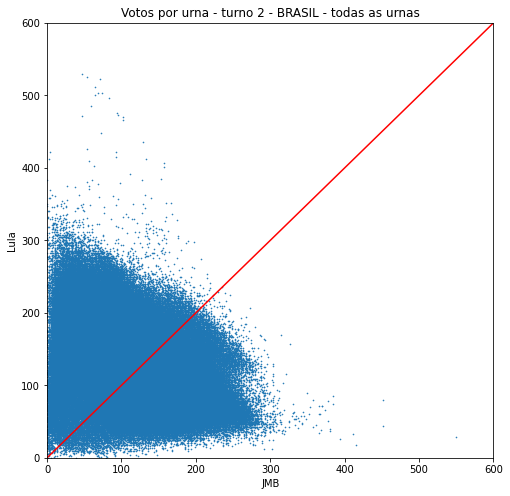

In [64]:
# grafico todas as urnas
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(df_pvt_buBR[jmb], df_pvt_buBR[lil], 'o', ms=0.6)
# ax.plot((600,0),(0,600),c='grey')
# ax.plot((400,0),(0,400),c='grey')
ax.plot((0,600),(0,600),c='red')

ax.set_title('Votos por urna - turno 2 - BRASIL - todas as urnas')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_xlabel('JMB')
ax.set_ylabel('Lula');

In [65]:
def plot_votos_urnas_pre_pos_ue2020(df1,df2,local,ms,l1):
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(16,8))

    ax = axs[0]
    ax.plot(df1[jmb], df1[lil], 'o', ms=ms)
    ax.plot((600,0),(0,600),c='grey')
    ax.plot((l1,0),(0,l1),c='grey')
    ax.plot((0,600),(0,600),c='red')
    ax.set(adjustable='box', aspect='equal')
    ax.set_title(f'Votos por urna - turno 2 - {local} - urnas PRÉ-2020')
    ax.set_xlabel('JMB')
    ax.set_ylabel('Lula');

    ax = axs[1]
    ax.plot(df2[jmb], df2[lil], 'o', ms=ms)
    ax.plot((600,0),(0,600),c='grey')
    ax.plot((l1,0),(0,l1),c='grey')
    ax.plot((0,600),(0,600),c='red')
    ax.set(adjustable='box', aspect='equal')
    ax.set_title(f'Votos por urna - turno 2 - {local} - urnas 2020')
    ax.set_xlabel('JMB')
    ax.set_ylabel('Lula');
#     return fig,axs

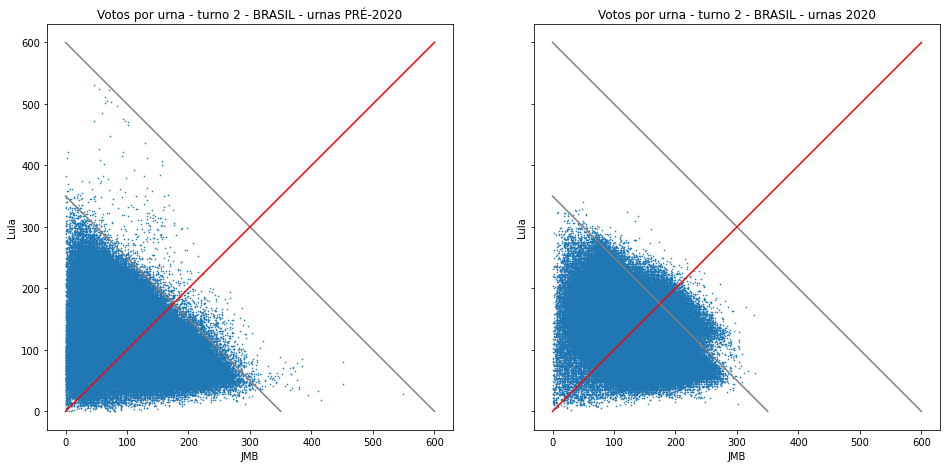

In [66]:
# urnas pré/pós 2020

df1 = df_pvt_buBR_ue_pre2020
df2 = df_pvt_buBR_ue2020

plot_votos_urnas_pre_pos_ue2020(df1,df2,local='BRASIL',ms=0.6,l1=350)

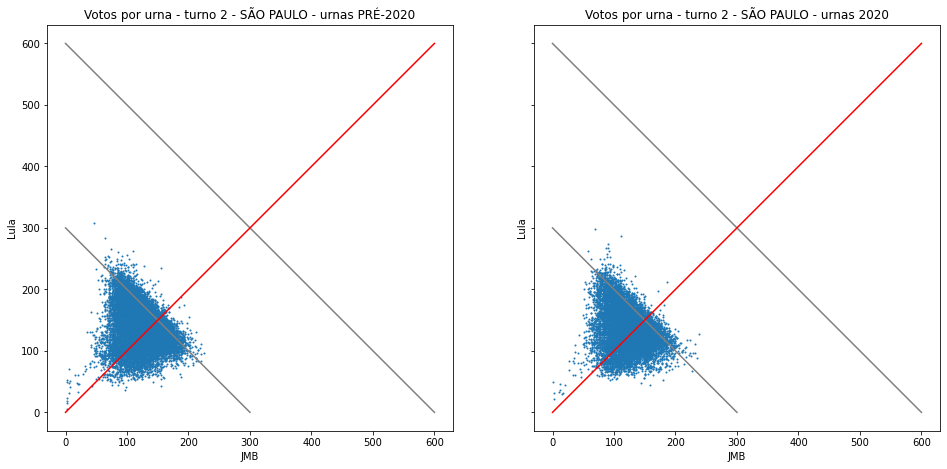

In [67]:
# urnas pré/pós 2020

cidade = 'SÃO PAULO'
df1 = df_pvt_buBR_ue_pre2020.query(f'NM_MUNICIPIO == "{cidade}"')
df2 = df_pvt_buBR_ue2020.query(f'NM_MUNICIPIO == "{cidade}"')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=cidade,ms=1,l1=300)

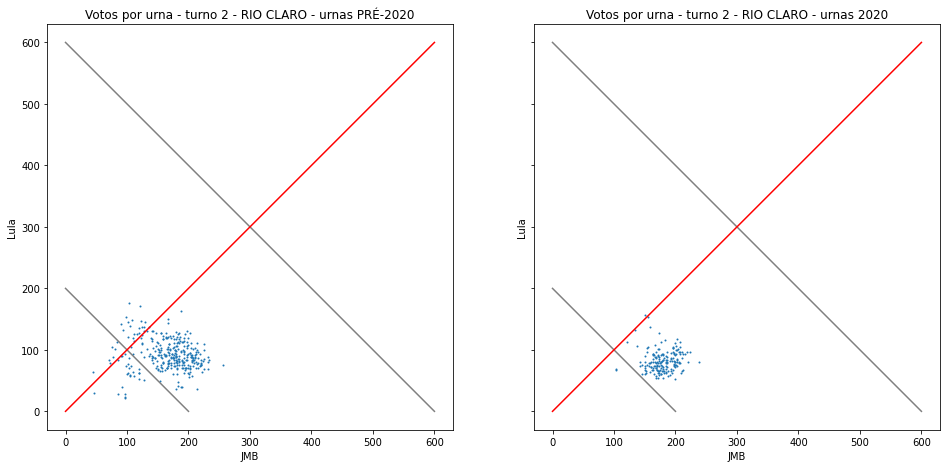

In [68]:
# urnas pré/pós 2020
cidade = 'RIO CLARO'
df1 = df_pvt_buBR_ue_pre2020.query(f'NM_MUNICIPIO == "{cidade}"')
df2 = df_pvt_buBR_ue2020.query(f'NM_MUNICIPIO == "{cidade}"')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=cidade,ms=1,l1=200)

### Dados de população e estados

In [69]:
fpop ='./tse_2022/estimativa_dou_2021.csv'
df_pop = pd.read_csv(fpop, sep=sep, encoding=enc)
df_pop['NM_MUNICIPIO'] = df_pop['NOME DO MUNICÍPIO'].str.upper()

In [70]:
df_pop

,UF,COD UF,COD MUNIC,NOME DO MUNICÍPIO,POP,NM_MUNICIPIO
0,RO,11,15,Alta Floresta D'Oeste,22516,ALTA FLORESTA D'OESTE
1,RO,11,23,Ariquemes,111148,ARIQUEMES
2,RO,11,31,Cabixi,5067,CABIXI
3,RO,11,49,Cacoal,86416,CACOAL
4,RO,11,56,Cerejeiras,16088,CEREJEIRAS
...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14088,VIANÓPOLIS
5566,GO,52,22054,Vicentinópolis,9002,VICENTINÓPOLIS
5567,GO,52,22203,Vila Boa,6451,VILA BOA
5568,GO,52,22302,Vila Propício,5941,VILA PROPÍCIO


In [71]:
# merge com df boletins de urna
dv_bu_mun = pd.merge(left=df_pvt_buBR, right=df_pop)

In [72]:
# urnas modelo pre-2020 - com municipios
dv_bu_mun_ue_pre2020 = dv_bu_mun.query('modelo_urna != "UE2020"')
len(dv_bu_mun_ue_pre2020['NR_URNA_EFETIVADA'].unique())

277678

In [73]:
# apenas urnas modelo 2020 - com municipios
dv_bu_mun_ue2020 = dv_bu_mun.query('modelo_urna == "UE2020"')
len(dv_bu_mun_ue2020['NR_URNA_EFETIVADA'].unique())

192398

### gráficos urnas x estados

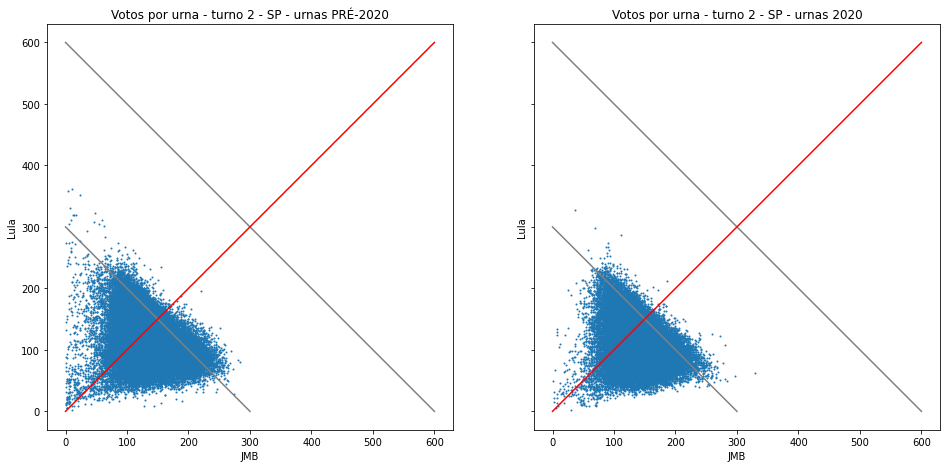

In [74]:
# urnas pré/pós 2020

uf = 'SP'
df1 = dv_bu_mun_ue_pre2020.query(f'UF == "{uf}"')
df2 = dv_bu_mun_ue2020.query(f'UF == "{uf}"')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=uf,ms=1,l1=300)

### gráficos urnas x regiões

In [75]:
# regioes
rNO = [['AM','RR','AP','PA','TO','RO','AC'],'NORTE']
rNE = [['MA','PI','CE','RN','PE','PB','SE','AL','BA'],'NORDESTE']
rCO = [['MT','MS','GO','DF'],'CENTRO-OESTE']
rSE = [['SP','RJ','ES','MG'],'SUDESTE']
rSU = [['PR','RS','SC'],'SUL']

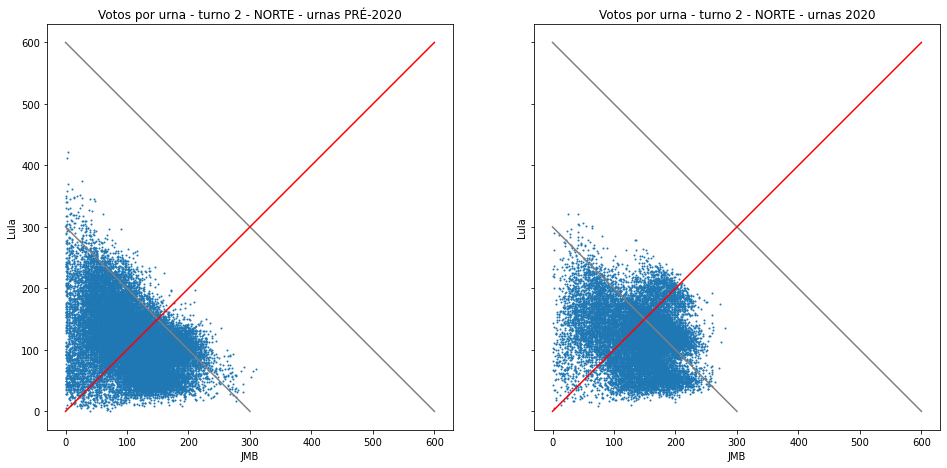

In [76]:
# urnas pré/pós 2020

reg = rNO
df1 = dv_bu_mun_ue_pre2020.query(f'UF in {reg[0]}')
df2 = dv_bu_mun_ue2020.query(f'UF in {reg[0]}')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=reg[1],ms=1,l1=300)

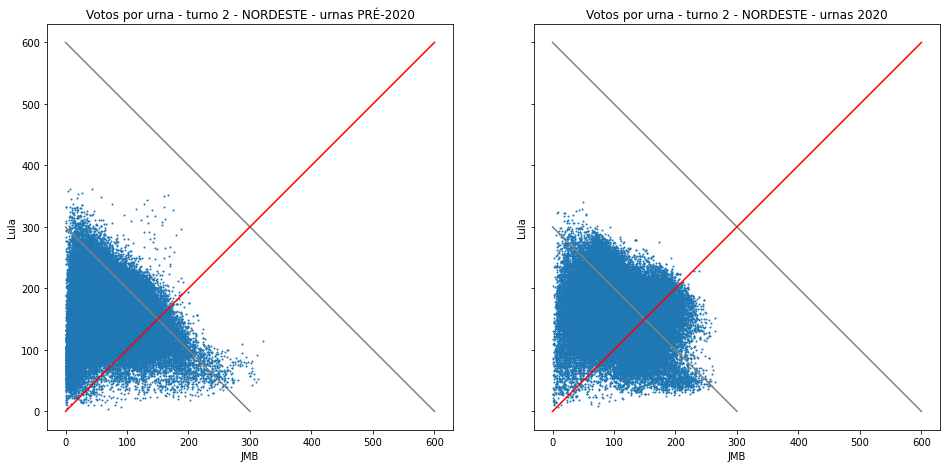

In [78]:
# urnas pré/pós 2020

reg = rNE
df1 = dv_bu_mun_ue_pre2020.query(f'UF in {reg[0]}')
df2 = dv_bu_mun_ue2020.query(f'UF in {reg[0]}')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=reg[1],ms=1,l1=300)

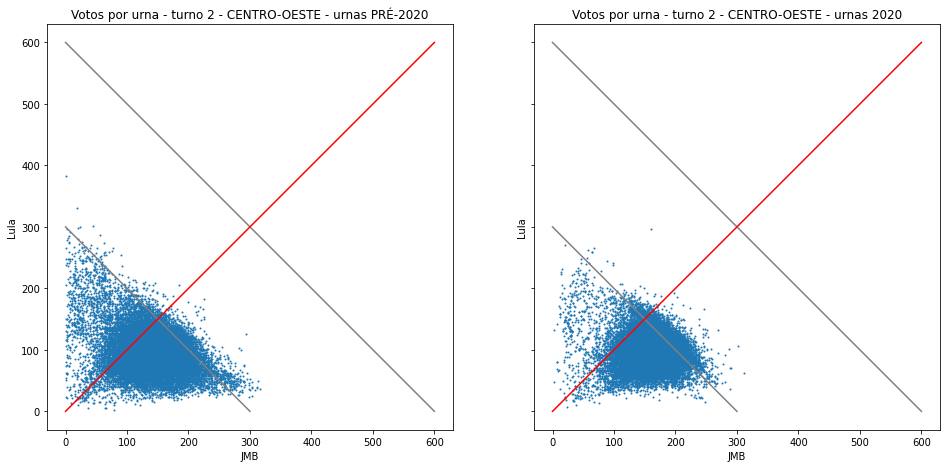

In [79]:
# urnas pré/pós 2020

reg = rCO
df1 = dv_bu_mun_ue_pre2020.query(f'UF in {reg[0]}')
df2 = dv_bu_mun_ue2020.query(f'UF in {reg[0]}')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=reg[1],ms=1,l1=300)

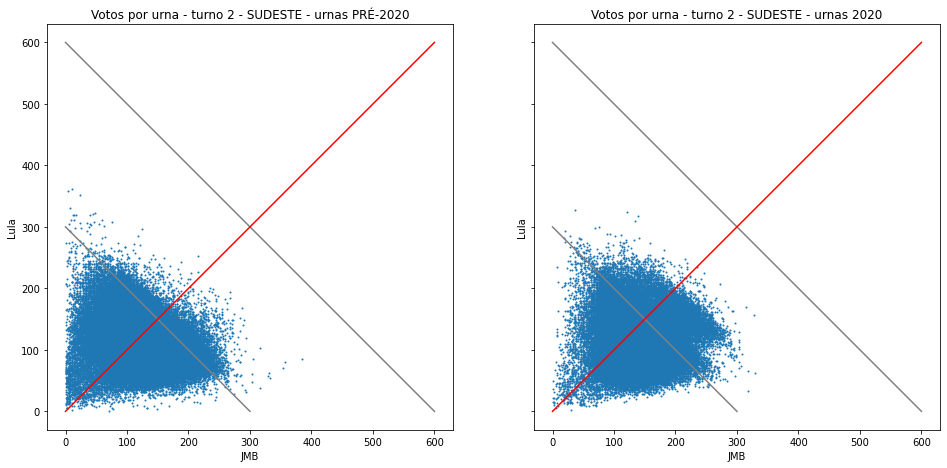

In [80]:
# urnas pré/pós 2020

reg = rSE
df1 = dv_bu_mun_ue_pre2020.query(f'UF in {reg[0]}')
df2 = dv_bu_mun_ue2020.query(f'UF in {reg[0]}')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=reg[1],ms=1,l1=300)

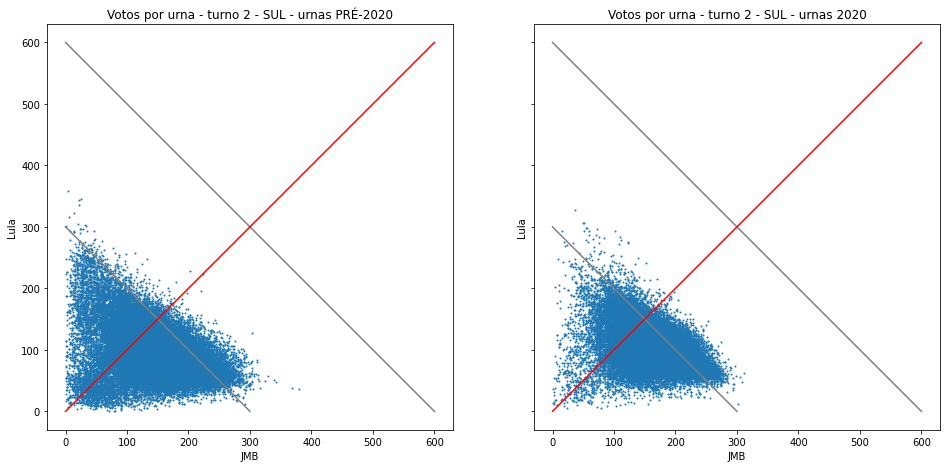

In [81]:
# urnas pré/pós 2020

reg = rSU
df1 = dv_bu_mun_ue_pre2020.query(f'UF in {reg[0]}')
df2 = dv_bu_mun_ue2020.query(f'UF in {reg[0]}')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=reg[1],ms=1,l1=300)

### gráficos urnas x regiões e habitantes

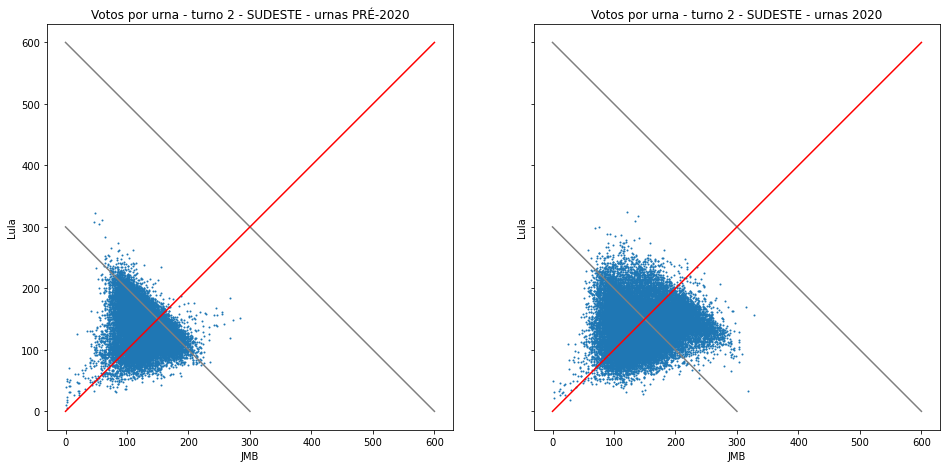

In [88]:
# urnas pré/pós 2020

reg = rSE
pop1 = 1000000
pop2 = 25000000
df1 = dv_bu_mun_ue_pre2020.query(f'UF in {reg[0]} and POP < {pop2} and POP > {pop1}')
df2 = dv_bu_mun_ue2020.query(f'UF in {reg[0]} and POP < {pop2} and POP > {pop1}')

plot_votos_urnas_pre_pos_ue2020(df1,df2,local=reg[1],ms=1,l1=300)